<a href="https://colab.research.google.com/github/iestleija/4808-Programacion/blob/Unidad1/Unidad1/Practices/Practica7_266229.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maestría en Intelingencia Artificial y Analítica de Datos**

- Curso: Programación para Analítica Descriptiva y Predictiva

- Semestre: Enero-Junio

- Profesor: Dr. Vicente García Jiménez
- Práctica: 07 Análisis de un Dataset con Matplotlib
- Alumno: Ismael Estrada Leija
- Matrícula: 266229

# Práctica #7 - Unidad 1. Análisis de un Dataset con Matplotlib

### Preparación del ambiente

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Carga y exploración del dataset:

 - Cargar el dataset Iris utilizando seaborn o cualquier otro dataset de su elección.
 - Verificar las primeras filas del dataset con el método .head().


In [51]:

# Dataset download
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


 - Obtener información general sobre los datos (nombres de columnas, tipos de datos, valores nulos, etc.).

Se obtiene información general del DataFrame de Pandas, de lo que se desprende que es una tabla de 150 filas por 5 columnas, con ausencia de valores nulos; los tipos de datos son float64 para 4 columnas y una de ellas tipo object.

In [52]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Se presenta ahora el análisis estadístico de los valores de la tabla para las 5 columnas numéricas.

In [53]:
print(iris.describe())


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


En la búsqueda de valores nulos se confirma la ausencia de los mismos en el conjunto de datos.

In [54]:
print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# Crear los siguientes gráficos con Matplotlib:

## a) Gráfico de barras:

Objetivo: Comparar el promedio de largo y ancho de los pétalos entre las tres especies de Iris.

Instrucciones: Utiliza un gráfico de barras para mostrar la media de las columnas petal_length y petal_width agrupadas por species.

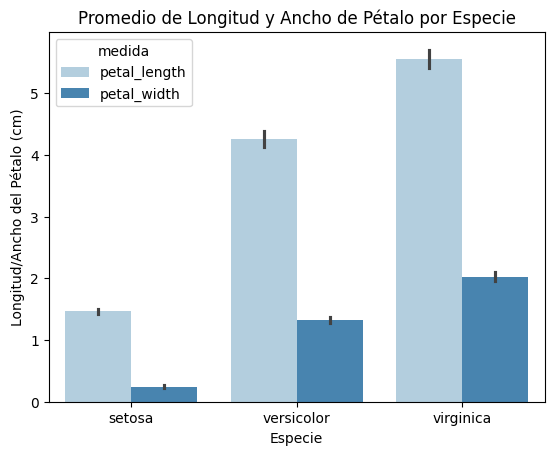

In [62]:
#series preparation
iris_melted = iris.melt(id_vars="species",
                        value_vars=["petal_length", "petal_width"],
                        var_name="medida",
                        value_name="centimetros")
#bar graph definition
sns.barplot(data=iris_melted, x="species", y="centimetros", hue="medida", palette="Blues")

#customization
plt.xlabel("Especie")
plt.ylabel("Longitud/Ancho del Pétalo (cm)")
plt.title("Promedio de Longitud y Ancho de Pétalo por Especie")
plt.show()

## b) Histograma:

Objetivo: Visualizar la distribución de los largos de los sépalos (sepal_length).

Instrucciones: Crea un histograma de la variable sepal_length y asegúrate de que tenga un número adecuado de bins. Coloca etiquetas en los ejes y un título.

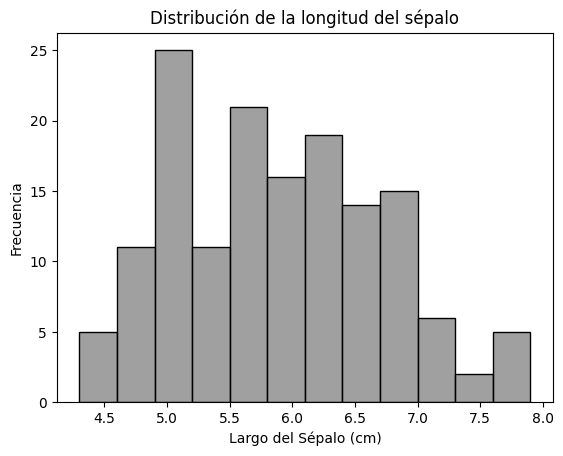

In [60]:
# histogram definition
sns.histplot(data=iris, x='sepal_length', bins=12, color='gray')

# customization
plt.xlabel('Largo del Sépalo (cm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la longitud del sépalo')

#display
plt.show()

## c) Gráfico de dispersión (scatter plot):

Objetivo: Relacionar el largo del pétalo con el ancho del pétalo.

Instrucciones: Crea un gráfico de dispersión que compare petal_length con petal_width.
Usa un color diferente para cada especie.

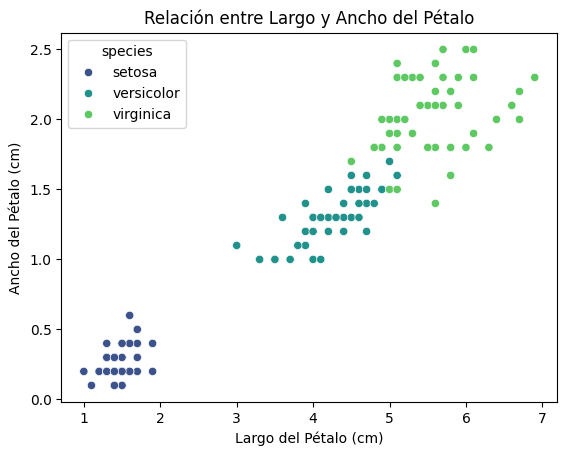

In [57]:
# Scatter graph definition
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='viridis')

# customization
plt.title('Relación entre Largo y Ancho del Pétalo')
plt.xlabel('Largo del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')
plt.show()

## d) Gráfico de cajas (box plot):

Objetivo: Analizar la distribución de las medidas del sépalo (sepal_length, sepal_width).

Instrucciones: Crea un gráfico de cajas para mostrar la distribución de las variables sepal_length y sepal_width por especie.

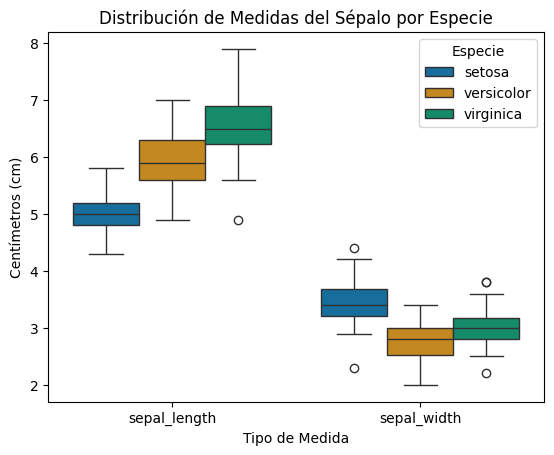

In [65]:

# Use the metl function to merge both sizes in one column
iris_melted = iris.melt(id_vars=['species'],
                        value_vars=['sepal_length', 'sepal_width'],
                        var_name='medida',
                        value_name='valor')

# boxplot graph definition
sns.boxplot(data=iris_melted, x='medida', y='valor', hue='species', palette='colorblind')

# Customization
plt.title('Distribución de Medidas del Sépalo por Especie')
plt.xlabel('Tipo de Medida')
plt.ylabel('Centímetros (cm)')
plt.legend(title='Especie')

plt.show()

## e) Gráfico de líneas:

Objetivo: Mostrar la tendencia de la longitud del pétalo (petal_length) a través de las observaciones.

Instrucciones: Crea un gráfico de líneas utilizando la variable petal_length (en el eje Y) con el índice de las observaciones (en el eje X). Puedes hacer esto para ver cómo varía la longitud del pétalo a lo largo del dataset.

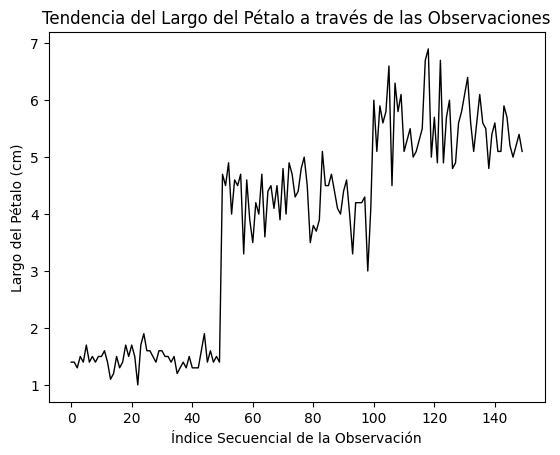

In [59]:
# Line graph definition
sns.lineplot(data=iris, x=iris.index, y='petal_length', linewidth=1, color='black')

# Customization
plt.title('Tendencia del Largo del Pétalo a través de las Observaciones')
plt.xlabel('Índice Secuencial de la Observación')
plt.ylabel('Largo del Pétalo (cm)')

# Display
plt.show()








Formato y personalización de los gráficos:

Asegúrate de personalizar cada gráfico con títulos, etiquetas en los ejes, y leyendas cuando sea necesario.
Experimenta con diferentes colores, tamaños de figura y estilos de línea.

No olvides enviar el archivo TXT con la liga a tu notebook en Google Colab y Github